In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | meyungs
City not found. Skipping...
Processing Record 3 of Set 1 | lebork
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | tual
Processing Record 10 of Set 1 | diban
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | noumea
Processing Record 15 of Set 1 | tabou
Processing Record 16 of Set 1 | bentiu
Processing Record 17 of Set 1 | tucumcari
Processing Record 18 of Set 1 | hay river
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | sahrak
City not found. Skipping...
Processing Record 23 of Se

Processing Record 39 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | novo cruzeiro
Processing Record 42 of Set 4 | pangai
Processing Record 43 of Set 4 | moree
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | colares
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | kudat
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | cockburn town
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | samusu
City not found. Skipping...
Processing Record 4 of Set 5 | salisbury
Processing Record 5 of Set 5 | spring valley
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | sept-iles
Processing Record 8 of Set 5 | alyangula
Processing Record 9 of Set 5 | avera
Processing Record

Processing Record 29 of Set 8 | zeya
Processing Record 30 of Set 8 | altamont
Processing Record 31 of Set 8 | husavik
Processing Record 32 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | nayoro
Processing Record 35 of Set 8 | mega
Processing Record 36 of Set 8 | othonoi
City not found. Skipping...
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | lloydminster
Processing Record 39 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 8 | okha
Processing Record 41 of Set 8 | adrar
Processing Record 42 of Set 8 | kalofer
Processing Record 43 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 8 | inta
Processing Record 45 of Set 8 | bitung
Processing Record 46 of Set 8 | zhezkazgan
Processing Record 47 of Set 8 | baturaja
Processing Record 48 of Set 8 | sturgeon falls
Processing Record 49 of Set 8 | raudeberg
Processing Record 50 of Set 8 | bambous v

Processing Record 18 of Set 12 | cabo rojo
Processing Record 19 of Set 12 | coihaique
Processing Record 20 of Set 12 | huarmey
Processing Record 21 of Set 12 | mandalgovi
Processing Record 22 of Set 12 | marienberg
Processing Record 23 of Set 12 | xadani
City not found. Skipping...
Processing Record 24 of Set 12 | goderich
Processing Record 25 of Set 12 | kuytun
Processing Record 26 of Set 12 | maloshuyka
City not found. Skipping...
Processing Record 27 of Set 12 | sol-iletsk
Processing Record 28 of Set 12 | bairiki
Processing Record 29 of Set 12 | rawson
Processing Record 30 of Set 12 | novoagansk
Processing Record 31 of Set 12 | wajir
Processing Record 32 of Set 12 | laukaa
Processing Record 33 of Set 12 | krasnoselkup
Processing Record 34 of Set 12 | radcliff
Processing Record 35 of Set 12 | goundam
Processing Record 36 of Set 12 | cascais
Processing Record 37 of Set 12 | vermilion
Processing Record 38 of Set 12 | kandrian
Processing Record 39 of Set 12 | deputatskiy
Processing Reco

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,73.56,68,20,14.29,UY,2022-01-30 22:04:45
1,Lebork,54.5392,17.7501,36.99,67,96,18.23,PL,2022-01-30 22:04:45
2,Bluff,-46.6000,168.3333,68.81,85,93,4.43,NZ,2022-01-30 22:02:50
3,Jamestown,42.0970,-79.2353,20.08,45,100,3.00,US,2022-01-30 22:01:09
4,Fortuna,40.5982,-124.1573,60.42,74,0,1.99,US,2022-01-30 22:00:55
5,Dikson,73.5069,80.5464,-3.62,93,100,21.07,RU,2022-01-30 22:04:45
6,Barrow,71.2906,-156.7887,-15.32,100,87,8.93,US,2022-01-30 21:59:59
7,Tual,-5.6667,132.7500,83.73,78,100,22.64,ID,2022-01-30 22:04:46
8,Diban,35.0365,40.5167,45.90,57,68,10.42,SY,2022-01-30 22:04:46
9,Ushuaia,-54.8000,-68.3000,48.72,56,64,9.35,AR,2022-01-30 22:01:32


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-01-30 22:04:45,-33.6971,-53.4616,73.56,68,20,14.29
1,Lebork,PL,2022-01-30 22:04:45,54.5392,17.7501,36.99,67,96,18.23
2,Bluff,NZ,2022-01-30 22:02:50,-46.6000,168.3333,68.81,85,93,4.43
3,Jamestown,US,2022-01-30 22:01:09,42.0970,-79.2353,20.08,45,100,3.00
4,Fortuna,US,2022-01-30 22:00:55,40.5982,-124.1573,60.42,74,0,1.99
5,Dikson,RU,2022-01-30 22:04:45,73.5069,80.5464,-3.62,93,100,21.07
6,Barrow,US,2022-01-30 21:59:59,71.2906,-156.7887,-15.32,100,87,8.93
7,Tual,ID,2022-01-30 22:04:46,-5.6667,132.7500,83.73,78,100,22.64
8,Diban,SY,2022-01-30 22:04:46,35.0365,40.5167,45.90,57,68,10.42
9,Ushuaia,AR,2022-01-30 22:01:32,-54.8000,-68.3000,48.72,56,64,9.35


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

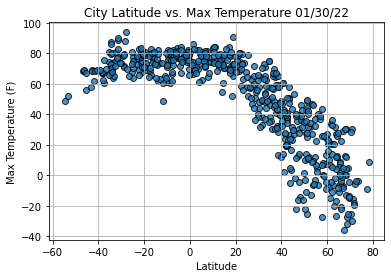

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

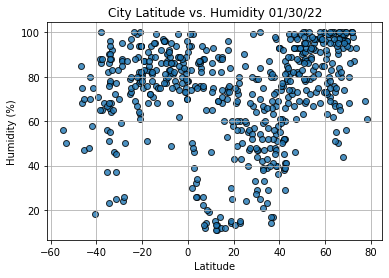

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

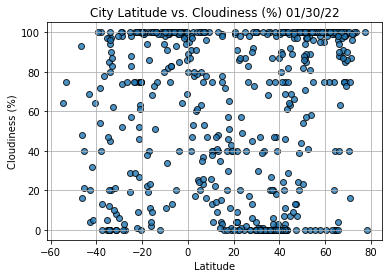

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

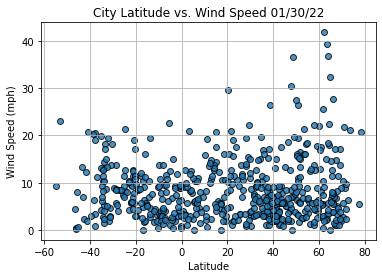

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

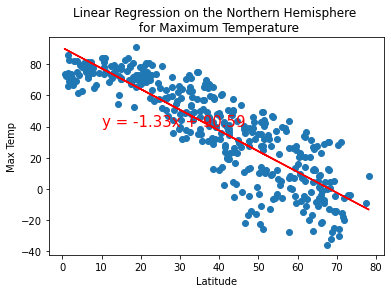

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

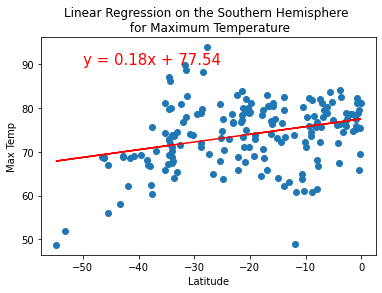

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

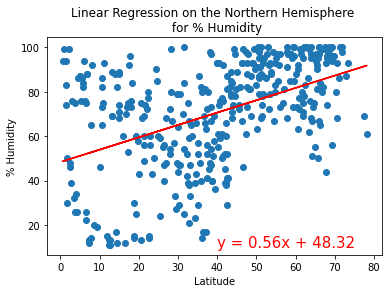

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

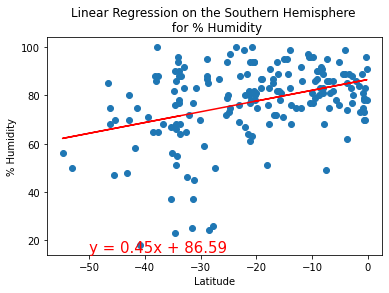

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

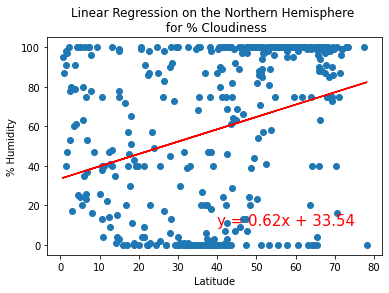

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Humidity',(40,10))

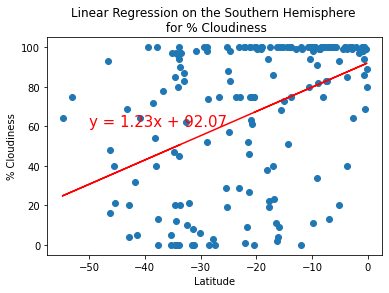

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

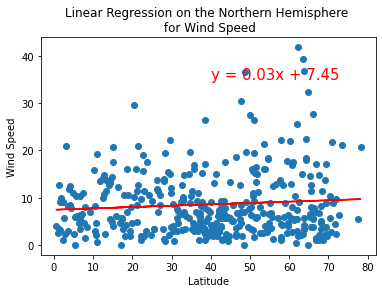

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

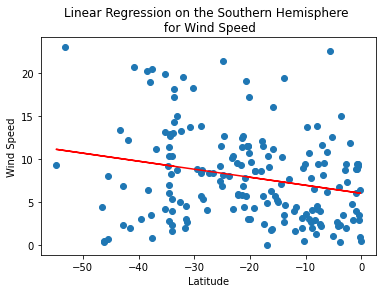

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))